In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import os
from scipy.signal import argrelextrema
from scipy import integrate as intg
from scipy.misc import derivative



In [11]:
import glob
data_array=[]

for ifile in glob.iglob('dataset_example_ITA/Time_series/Simulation_*.csv'):
    print(ifile)
    df = pd.read_csv(ifile)
    df.drop(columns=df.columns[0], axis=1,  inplace=True)

  #  df = df.drop('Time', axis=1)
    
    data_array.append(df)

dataset_example_ITA/Time_series\Simulation_1.csv
dataset_example_ITA/Time_series\Simulation_2.csv


In [44]:
df_dmg_sim = pd.read_csv('dataset_example_ITA/Damage_simulations.csv')
df_dmg_sim

,Simulation_ID,Dmg_coord_x,Dmg_coord_y,Dmg_coord_z,Dmg_size,Dmg_orient_x,Dmg_orient_y,Dmg_orient_z,Dmg_type
0,1,0,0.35,0,0.00,0,0,0,delamination
1,2,0,0.35,0,0.15,0,0,0,delamination


In [61]:
dmg_x           = df_dmg_sim.iloc[:,1]
dmg_y           = df_dmg_sim.iloc[:,2]
dmg_z           = df_dmg_sim.iloc[:,3]
dmg_size        = df_dmg_sim.iloc[:,4]
dmg_orient_x    = df_dmg_sim.iloc[:,5]
dmg_orient_y    = df_dmg_sim.iloc[:,6]
dmg_orient_z    = df_dmg_sim.iloc[:,7]
dmg_orient_type = df_dmg_sim.iloc[:,8]





In [82]:
df_sensor_loc = pd.read_csv('dataset_example_ITA/Sensor_locations.csv')
df_sensor_loc

,Sensor_ID,X,Y,Z
0,Sensor_1,0,0.1,0.005
1,Sensor_2,0,0.6,0.005
2,Sensor_3,0,0.1,-0.010
3,Sensor_4,0,0.6,-0.010


In [87]:
sensor_1 = []
sensor_2 = []
sensor_3 = []
sensor_4 = []

sensor_1.append(df_sensor_loc.at[0, 'X'])
sensor_1.append(df_sensor_loc.at[0, 'Y'])
sensor_1.append(df_sensor_loc.at[0, 'Z'])

sensor_2.append(df_sensor_loc.at[1, 'X'])
sensor_2.append(df_sensor_loc.at[1, 'Y'])
sensor_2.append(df_sensor_loc.at[1, 'Z'])

sensor_3.append(df_sensor_loc.at[2, 'X'])
sensor_3.append(df_sensor_loc.at[2, 'Y'])
sensor_3.append(df_sensor_loc.at[2, 'Z'])

sensor_4.append(df_sensor_loc.at[3, 'X'])
sensor_4.append(df_sensor_loc.at[3, 'Y'])
sensor_4.append(df_sensor_loc.at[3, 'Z'])

sensor_1, sensor_2, sensor_3,sensor_4

([0, 0.1, 0.005], [0, 0.6, 0.005], [0, 0.1, -0.01], [0, 0.6, -0.01])

In [77]:
time = []
sensors = []

for df in data_array:
    time.append(df.iloc[:,0].values)
    sensors_df = []

    for i in range(1, 5):
        sensors_df.append(df.iloc[:,i])

    sensors.append(sensors_df)




In [60]:
print(np.shape(sensors))
print(len(sensors[0]))

(2, 4, 501)
4


In [23]:
def rebin_arrays(x, y , bins):

    x_binned = []
    y_binned = []

    for i in range(0, bins):
    
        step = int(len(y)/bins)
        #print(step)
        y_mean = 0
        x_mean = 0
        for k in range(i*step, step*(i+1)):
            y_mean = y_mean + y[k]
            x_mean = x_mean + x[k]

        y_binned.append(y_mean/step)
        x_binned.append(x_mean/step)

    return np.array(x_binned), np.array(y_binned)

In [73]:
def multiplyList( listOfnumbers, multiplier ):
    output_list = []
    for i in range(0,len(listOfnumbers)):
        output_list.append(listOfnumbers[i]*multiplier)

    return output_list

In [72]:
type(time)

list

In [78]:
time = multiplyList(time, 1000)


#Draw the signal outputs

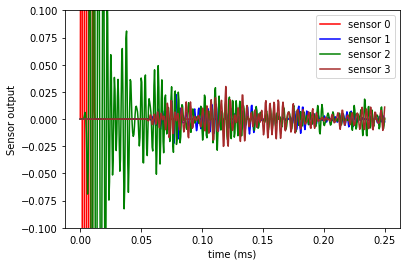

In [129]:
plot_ID = 1 #simulation_ID
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('time (ms)') 
ax1.set_ylabel('Sensor output') 
#plt.yscale('log')
ax1.set_ylim(-0.1, 0.1)
#ax1.set_xlim(0, 0.05)
#ax1.set_xlim(0, 0.0001)

plt.plot(time[plot_ID], sensors[plot_ID][0], color = 'red' ,      label='sensor 0') 
plt.plot(time[plot_ID], sensors[plot_ID][1], color = 'blue' ,     label='sensor 1') 
plt.plot(time[plot_ID], sensors[plot_ID][2], color = 'green' ,    label='sensor 2') 
plt.plot(time[plot_ID], sensors[plot_ID][3], color = 'brown' ,    label='sensor 3') 

plt.legend()


Draw the sensor and the simulated dmg location

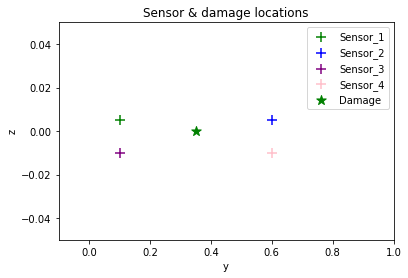

In [106]:
fig, ax1 = plt.subplots() 

ax1.set_xlabel('y') 
ax1.set_ylabel('z') 
plt.title('Sensor & damage locations')
#plt.yscale('log')
#ax1.set_ylim(0.00001, 15)
ax1.set_xlim(-0.1, 1)
ax1.set_ylim(-0.05, 0.05)
plt.scatter(sensor_1[1], sensor_1[2], color="green"   , label='Sensor_1', marker = "+",s=100) # plotting single point
plt.scatter(sensor_2[1], sensor_2[2], color="blue"  , label='Sensor_2', marker = "+",s=100) # plotting single point
plt.scatter(sensor_3[1], sensor_3[2], color="purple", label='Sensor_3', marker = "+",s=100) # plotting single point
plt.scatter(sensor_4[1], sensor_4[2], color="pink"  , label='Sensor_4', marker = "+",s=100) # plotting single point
plt.scatter(dmg_y[plot_ID], dmg_z[plot_ID], color="green"  , label='Damage', marker = "*",s=100) # plotting single point

plt.legend()

In [118]:
type(sensors)
arr_1 = np.array(sensors)
arr_1[0][0].shape, arr_1[1][0].shape

#sensor_1_ratio = divide()
sensor_1_ratio = np.divide(arr_1[0][0], arr_1[1][0], out=np.ones_like(arr_1[0][0]), where=arr_1[1][0]!=0)
sensor_2_ratio = np.divide(arr_1[0][1], arr_1[1][1], out=np.ones_like(arr_1[0][1]), where=arr_1[1][1]!=0)
sensor_3_ratio = np.divide(arr_1[0][2], arr_1[1][2], out=np.ones_like(arr_1[0][2]), where=arr_1[1][2]!=0)
sensor_4_ratio = np.divide(arr_1[0][3], arr_1[1][3], out=np.ones_like(arr_1[0][3]), where=arr_1[1][3]!=0)

In [ ]:
sensor_1_ratio

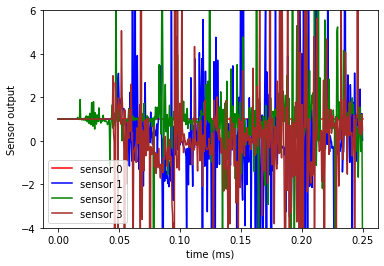

In [121]:
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('time (ms)') 
ax1.set_ylabel('Sensor output') 
#plt.yscale('log')
ax1.set_ylim(-4, 6)
#ax1.set_xlim(0, 0.05)
#ax1.set_xlim(0, 0.0001)

plt.plot(time[plot_ID], sensor_1_ratio, color = 'red' ,      label='sensor 0') 
plt.plot(time[plot_ID], sensor_2_ratio, color = 'blue' ,     label='sensor 1') 
plt.plot(time[plot_ID], sensor_3_ratio, color = 'green' ,    label='sensor 2') 
plt.plot(time[plot_ID], sensor_4_ratio, color = 'brown' ,    label='sensor 3') 

plt.legend()


In [145]:
len(time[0])

501

#https://towardsdatascience.com/feature-engineering-on-time-series-data-transforming-signal-data-of-a-smartphone-accelerometer-for-72cbe34b8a60

Take the FFT (FAST FOURIE transform of the signals. Apply feature extraction on the FFT's.)

501


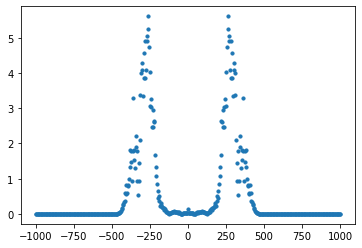

In [187]:
Sensor_number = 2 

from scipy.fft import fft, fftfreq
duration = 0.25
# Number of points
N = len(sensors[plot_ID][Sensor_number])
sample_rate = float(N / duration)
yf = fft(np.array(sensors[plot_ID][Sensor_number]))
xf = fftfreq(N, 1 / sample_rate)
print(len(yf))

plt.scatter(xf, np.abs(yf), marker= 'o', s=10)
plt.show()

#np.abs(yf)
#xf

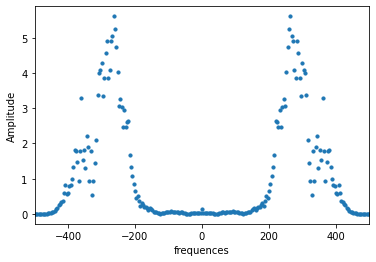

In [188]:
sorted_xf = np.sort(xf)
np.argsort(xf)
sorted_yf = yf[np.argsort(xf)]
#print(np.argsort(xf))
#sorted_yf[0]
#print(yf)
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('frequences') 
ax1.set_ylabel('Amplitude') 
#plt.yscale('log')
ax1.set_xlim(-500, 500)
plt.scatter(sorted_xf, np.abs(sorted_yf),marker='o', s=10)
plt.show()


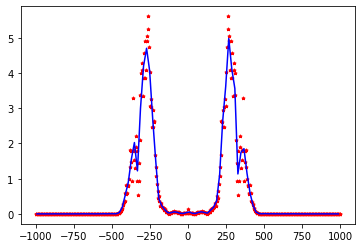

In [195]:
rebinned_xf, rebinned_yf = rebin_arrays(sorted_xf, np.abs(sorted_yf),100)
#plt.scatter(rebinned_xf, rebinned_yf,marker='o', s=10)
#plt.plot(sorted_xf, np.abs(sorted_yf), color='red')

plt.scatter(sorted_xf, np.abs(sorted_yf),marker='*', color='red', s=10)
plt.plot(rebinned_xf, rebinned_yf, color='blue')



In [151]:
len(xf)

501

In [147]:
type(normalized_tone)

numpy.ndarray